# Chute d'une météorite


### Etudiants : CHEN Qin , BENARI Amine , BREDA Aurélien

# I.Introduction

On s'intéresse à la chute d'une météorite dans l'atmosphère. Le but de ce projet

# II.Modèle

graphe qu'on peut tracer : z(t), v(t), v(z) (en changeant la masse)

https://fr.wikipedia.org/wiki/Crat%C3%A8re_d%27impact

https://documents.epfl.ch/users/m/ms/mschalle/www/SiteWeb/ComputationalPhysics/physNum_report2.pdf


# III.Modélisation

(Calculer perte de masse ? (important?) m(z)?) : on néglige pour l'instant

on considère une sphère

composition homogène : fer

température atmosphère constante

référentiel considéré Galiléen le temps de l'étude << 24h

mouvement en 1 dimension, et angle impact $\theta = 90°$

On suppose que l'air se comporte comme un gaz parfait. On considère que l'atmosphère est isotherme avec $T = T_0 =$ 15°C.    
Il s'agit ici de définir la fonction **MassVol_1(z)** permettant de calculer la masse volumique $\rho_1(z)$ de l'air dans ce modèle d'atmosphère isotherme. Pour cela, vous procéderez selon trois étapes :    
i) En utilisant la loi des gaz parfaits, montrer que $\rho_1(z) = K_1 p(z)$ (relation n°1), où $p(z)$ est la pression et $K_1$ est à exprimer en fonction de la masse molaire $M$ de l'air, de la constante des gaz parfaits $\mathcal{R}$ et de $T_0 $.  
ii) L'équation traduisant l'équilibre local en un point situé à l'altitude $z$ s'exprime de la façon suivante : $\frac{\mathrm{d}p(z)}{\mathrm{d}z} = -\rho_1(z) g$, soit encore : $\frac{\mathrm{d}p(z)}{p(z)} = - K_1 g\mathrm{d}z$, en utilisant la relation n°1. Intégrer cette équation pour trouver l'expression de la pression $p(z)$ (relation n°2). On suppose que $p(z=0) = p_0$ (pression atmosphérique).   
iii) En combinant les relations n°1 et n°2, en déduire une expression de $\rho_1(z)$.

On considère que la température $T$ décroit linéairement quand l'altitude $z$ augmente, avec un gradient typique $\alpha = -$0.0065 K/m ; ainsi $T$ en (°C) varie selon la relation suivante : $T(z) = T_0 + \alpha z$, où $T_0 =$ 15 °C est la température en $z = 0$. 

Il s'agit ici de définir la fonction **MassVol_2(z)** permettant de calculer la masse volumique $\rho_2(z)$ de l'air dans ce modèle d'atmosphère avec gradient de température constant. Pour cela, vous procéderez selon trois étapes :    
i) Réécrire la relation n°1 sachant que la température $T$ dépend désormais de $z$. On obtient ainsi la relation n°3.   
ii) L'équation traduisant l'équilibre local en un point situé à l'altitude $z$ s'exprime en utilisant la relation n°3 : $\frac{\mathrm{d}p(z)}{p(z)} = - K_2 g \frac{\mathrm{d}z}{T_0 + \alpha z}$, où $K_2$ est fonction de $M$ et de $\mathcal{R}$. Intégrer cette équation pour trouver l'expression de la pression $p(z)$ (relation n°4). On suppose que $p(z=0) = p_0$ (pression atmosphérique).   
iii) En combinant les relations n°3 et n°4, en déduire une expression de $\rho_2(z)$.

Au delà de la troposphère ($z\leqslant$ 11 km), on pénètre dans la stratosphère basse (11 km < $z \leqslant$ 25 km), dans laquelle la température reste quasiment constante ($T = -$56.5°C) avant d'atteindre la stratosphère haute ($z$ > 25 km), où la température croît linéairement selon la relation suivante :   $T$(°C) $= -$131,25 + 0.00299$z$. On néglige la dépendance de l'accélération de la pesanteur avec l'altitude ; on choisit comme norme de $\vec{g}$ : $g=$ 9,75 m/s$^2$.   

Il s'agit ici de définir la fonction **"MassVolTot(z)"** permettant de calculer la masse volumique $\rho_{tot}(z)$ de l'air entre 0 et 40 km d'altitude. Pour ce faire, il conviendra d'utiliser les modèles précédemment étudiés pour déterminer l'expression de la pression $p(z)$ dans chacune des zones de l'atmosphère, en appliquant les conditions initiales adéquates.

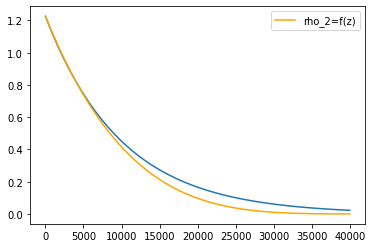

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Masse volumique
def rho(z):
    rho_0 = 1.226  #kg/m^3
    lamb = 10000  #m
    return rho_0 * np.exp(-z/lamb)

T = 288.25 #Température en K
R = 8.314510 #Constante des gaz parfaits en J.Kg-1.mol-1
M = 29e-3 #Masse molaire de l'air en Kg/mol
p0 = 101325 #Pression atmosphérique en Pa à 0 mètre
g = 9.75 #Accélération de la pesanteur en m/s^-2
K1 = M/(R*T)

K2 = M/R
𝛼 = -0.0065 #Gradient en K/m

def MassVol(z):
    """Précondition : z >= 0
    Renvoie la masse volumique de l'air en fonction de z"""
    return (p0*((T + 𝛼*z)/T)**(-K2*g/𝛼))*K2*(1/(T + 𝛼*z))

z = np.linspace(0,40000)

plt.plot(z, rho(z))
plt.plot(z, MassVol(z), color = 'orange', label='rho_2=f(z)') #Courbe de 𝜌2(𝑧)
plt.legend()
plt.show()

### Quelle masse faut-il à une météorite pour que son énergie à l'impact soit équivalent à celle d'une bombe nuclaire ?

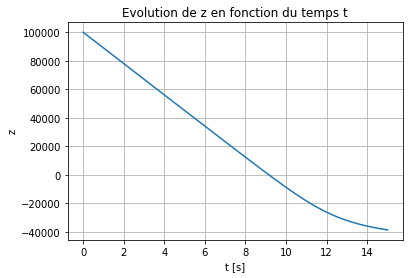

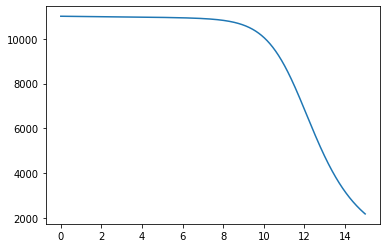

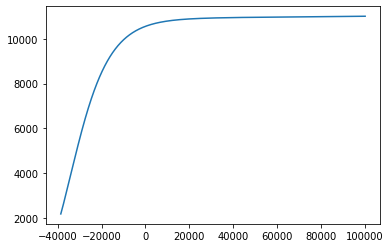

In [61]:
### Importation des librairies

import numpy as np
import matplotlib.pyplot as plt


### Initialisation des constantes

t_i = 0                                       # temps initial en s
t_f = 15                                   # temps final en s
Cx = 0.3
m = 37680000
rho_0 = 1.3
rho_m = 3000
g_0 = 9.81
lamb = 10000 #m    
G = -6.67*10**(-11)
M_T = 5.97*10**(24)
pas = 0.01
z_i = np.array([100000,11000])        # conditions initiales
ordre = 2                                     # ordre de l'équation différentielle
R_T = 6371000

### Définitions des fonctions

# Fonction loi de décroissance
def fderivee(conditions_i,t):
    '''
        Loi de décroissance 1 du1/dt = u2
        Loi de décroissance 2 du2/dt = -qu2 - omega^2u1
    '''
    derivees = np.empty(conditions_i.shape)
    
    
    derivees[1] = G*M_T/((R_T+conditions_i[0])**2)  -(rho_0 * np.exp(-conditions_i[0]/lamb)*Cx*np.pi*(3*m/(4*rho_m*np.pi))**(2/3)*conditions_i[1]**2)/(2*m)
    derivees[0] = -conditions_i[1]
    #(3*m*np.pi/(4*rho_m))**(2/3)
    
    #g_0/((1+conditions_i[0]/R_T)**2)G*M_T/((R_T+conditions_i[0])**2)
    
    return derivees

# Fonction de la méthode rk4
def rk4(start, end, step, conditions_i, derivee, ordre):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau M
    M = np.empty((ordre, num_points))     # Tableau de x (ligne 1) et de dx/dt (ligne 2) avec x valeur de la différentielle
    
    # Conditions initiales
    M[:, 0] = conditions_i                # place les premiers x et dx/dt dans M

    # Boucle for
    
    for i in range(num_points - 1):
        M[:, i + 1]= M[:, i] + step * derivee(M[:, i], t[i])
        
    # Argument de sortie
    return t, M                            # retourne l'array de temps et le tableau M


# Méthode rk4
temps, theta = rk4(t_i, t_f, pas, z_i, fderivee, ordre)
v = np.array(theta[0, :])
plt.plot(temps, v, '-')

# Affichage du graphe
plt.title("Evolution de z en fonction du temps t")
plt.xlabel('t [s]')
plt.ylabel('z')
plt.grid()
plt.show()

w = np.array(theta[1, :])
plt.plot(temps, w, '-')

plt.show()

plt.plot(v, w, '-')
plt.show()

In [62]:
k=0     #l'indice du premier valeur du rapport < 0.5
for i in range (len(v)):
    if v[i]<= 0:
        k=i
        break
print(k)
print(w[k])

916
10549.711343545492


In [63]:
def energie(x):
    return 0.5*m*x**2


In [64]:
energie(w[k])/2.1e15

0.9984877874768454